# Online Retail: Data Exploration Notebook

## Source  
Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

## Goals and Questions  
* Find groupings amongst customers (if any exist)  
* What items do customers buy most?  

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from dotenv import load_dotenv
load_dotenv()

True

## How can customers be grouped together?  

Steps were first taken to transform the original data set (where each row represented a purchase of a particlar product by a customer when the customer purchased it) into a form where each row represented a customer and that customer's purchase history. The script `dataset_generator.py` handles the processes to make that happen, and some of the resulting data sets are used here.  

The script `dataset_generator.py` already automates the fitting of the cluster model and creates the data sets that include the customers segmented by cluster. This section of the notebook aims to visualize the clusters and also show why two principle components were used instead of three.  

In [2]:
online_retail_data = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Online_Retail.csv", encoding='latin1')
quantities_of_purchases_by_customer = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Customer_Purchases.csv", encoding='latin1', index_col='CustomerID')
quantities_of_purchases_by_customer_norm = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Customer_Purchases_Norm.csv", encoding='latin1', index_col='CustomerID')

In [3]:
pca_2d = PCA(n_components=2)
principle_components_2d = pca_2d.fit_transform(quantities_of_purchases_by_customer_norm)
principle_2d_df = pd.DataFrame(data=principle_components_2d, columns=['pc1', 'pc2'])
principle_2d_df = principle_2d_df.set_index(quantities_of_purchases_by_customer_norm.index)
principle_2d_df

,pc1,pc2
CustomerID,,
12346,-0.100317,-0.004098
12347,0.861475,0.062529
12348,0.860436,0.031071
12349,0.884623,0.005115
12350,0.859357,0.036462
...,...,...
18280,-0.098861,-0.002994
18281,-0.091887,0.003007
18282,-0.099382,-0.001600


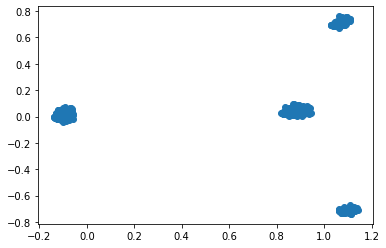

In [4]:
plt.scatter(principle_2d_df.pc1, principle_2d_df.pc2)
plt.show()

In [5]:
pca_3d = PCA(n_components=3)
principle_components_3d = pca_3d.fit_transform(quantities_of_purchases_by_customer_norm)
principle_3d_df = pd.DataFrame(data=principle_components_3d, columns=['pc1', 'pc2', 'pc3'])
principle_3d_df = principle_3d_df.set_index(quantities_of_purchases_by_customer_norm.index)
principle_3d_df

,pc1,pc2,pc3
CustomerID,,,
12346,-0.100317,-0.004099,-0.035444
12347,0.861475,0.062621,0.036423
12348,0.860436,0.031068,0.007468
12349,0.884623,0.005111,-0.066066
12350,0.859357,0.036481,-0.036079
...,...,...,...
18280,-0.098861,-0.002990,-0.031205
18281,-0.091887,0.002991,-0.005039
18282,-0.099382,-0.001598,-0.033878


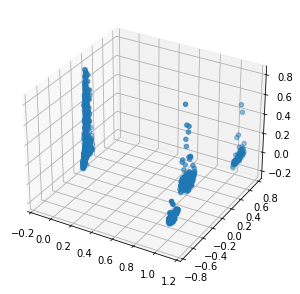

In [6]:
fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")
ax.scatter3D(principle_3d_df.pc1, principle_3d_df.pc2, principle_3d_df.pc3)
plt.show()

In [7]:
clustering_model = Birch(threshold=0.01, n_clusters=4)
clustering_model.fit(principle_2d_df)
predictions = clustering_model.predict(principle_2d_df)
clusters = np.unique(predictions)

In [8]:
principle_2d_df['Cluster'] = predictions
principle_2d_df

,pc1,pc2,Cluster
CustomerID,,,
12346,-0.100317,-0.004098,3
12347,0.861475,0.062529,0
12348,0.860436,0.031071,0
12349,0.884623,0.005115,0
12350,0.859357,0.036462,0
...,...,...,...
18280,-0.098861,-0.002994,3
18281,-0.091887,0.003007,3
18282,-0.099382,-0.001600,3


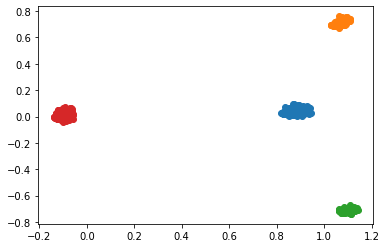

In [9]:
for cluster in clusters:
	pc1_cluster_n = principle_2d_df.query(f"Cluster == {cluster}").pc1
	pc2_cluster_n = principle_2d_df.query(f"Cluster == {cluster}").pc2
	plt.scatter(pc1_cluster_n, pc2_cluster_n)
plt.show()

## What do customers like to buy?

### Most popular products overall  

### Most popular products by cluster  

In [2]:
online_retail_data = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Online_Retail.csv", encoding='latin1')
online_retail_data.sample(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
332659,566087,84792,ENCHANTED BIRD COATHANGER 5 HOOK,8,9/9/2011 10:24,4.65,13319.0,United Kingdom
204070,554629,84801A,PINK HYDRANGEA ART FLOWER,6,5/25/2011 11:34,2.10,15882.0,United Kingdom
526239,580657,23502,PLAYING CARDS VINTAGE DOILY,12,12/5/2011 13:43,1.25,14696.0,United Kingdom
288162,562137,23296,SET OF 6 TEA TIME BAKING CASES,16,8/3/2011 10:04,1.25,12720.0,Germany
399748,571286,21744,SNOWFLAKE PORTABLE TABLE LIGHT,3,10/16/2011 14:35,2.95,14547.0,United Kingdom
315650,564733,20725,LUNCH BAG RED RETROSPOT,5,8/28/2011 13:18,1.65,17841.0,United Kingdom
316943,564757,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1,8/30/2011 10:36,5.79,NaN,United Kingdom
428809,573501,21470,FLOWER VINE RAFFIA FOOD COVER,2,10/31/2011 12:02,3.75,18055.0,United Kingdom
37385,539463,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6,12/19/2010 11:19,2.95,18077.0,United Kingdom
181562,552493,22683,FRENCH BLUE METAL DOOR SIGN 8,1,5/9/2011 16:21,2.46,NaN,United Kingdom


In [3]:
customer_purchases = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Customer_Purchases_Clusters.csv", encoding='latin1')
customer_purchases

,CustomerID,Cluster,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel_Islands,Cyprus,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
0,12346,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4368,18281,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4369,18282,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4370,18283,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
customer_purchases_norm = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Customer_Purchases_Clusters_Norm.csv", encoding='latin1')
customer_purchases_norm

,CustomerID,Cluster,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel_Islands,Cyprus,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
0,12346,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12347,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12348,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12349,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12350,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4368,18281,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4369,18282,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4370,18283,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
stock_codes = list(set(online_retail_data.StockCode.astype(str).values))
stock_codes.sort()
for i, stock_code in enumerate(stock_codes):
    stock_codes[i] = stock_code.replace(' ', '_')
stock_codes = stock_codes[:-8]

In [6]:
cluster0 = customer_purchases.query('Cluster == 0').set_index('CustomerID')
cluster0 = cluster0.loc[:, (cluster0 != 0).any(axis=0)]
cluster0['Cluster'] = 0
to_front_col = cluster0.pop('Cluster')
cluster0.insert(0, 'Cluster', to_front_col)
filter_col = [col for col in cluster0 if col in stock_codes]
cluster0[filter_col] = cluster0[filter_col].div(cluster0[filter_col].sum(axis=1), axis=0)
cluster0 = cluster0.dropna()
cluster0

,Cluster,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel_Islands,Cyprus,Czech_Republic,...,90164A,90166,90177D,90192,90201A,90201B,90201C,90201D,90205A,90205C
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17508,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17828,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
filter_col = [col for col in cluster0 if col in stock_codes]
cluster0_relative_stockcode_freq = pd.DataFrame(data = np.transpose(cluster0.groupby('Cluster').sum().reset_index()[filter_col]))
cluster0_relative_stockcode_freq = cluster0_relative_stockcode_freq.rename(columns={0: 'Cluster0'})
cluster0_relative_stockcode_freq

,Cluster0
10002,0.071333
10125,0.008190
10133,0.062994
10135,0.018775
11001,0.040772
...,...
90201B,0.000078
90201C,0.000078
90201D,0.000078
90205A,0.000052


In [24]:
stock_codes_with_highest_relative_value = pd.DataFrame(cluster0_relative_stockcode_freq.nlargest(10, ['Cluster0']).index).rename(columns={0: 'StockCode'})
cluster0_top_purchases = stock_codes_with_highest_relative_value.merge(online_retail_data, on='StockCode')[['StockCode', 'Description']].drop_duplicates().dropna()
cluster0_top_purchases['Desc_isupper'] = list(map(lambda x: x.isupper(), cluster0_top_purchases['Description']))
cluster0_top_purchases = cluster0_top_purchases.query('Desc_isupper == True').reset_index()[['StockCode', 'Description']]
cluster0_top_purchases

,StockCode,Description
0,23084,RABBIT NIGHT LIGHT
1,21212,PACK OF 72 RETROSPOT CAKE CASES
2,22556,PLASTERS IN TIN CIRCUS PARADE
3,22328,ROUND SNACK BOXES SET OF 4 FRUITS
4,22326,ROUND SNACK BOXES SET OF4 WOODLAND
5,22630,DOLLY GIRL LUNCH BOX
6,21977,PACK OF 60 PINK PAISLEY CAKE CASES
7,84997Z,CHILDRENS CUTLERY POLKADOT PINK
8,22492,MINI PAINT SET VINTAGE
9,22555,PLASTERS IN TIN STRONGMAN


In [11]:
cluster1 = customer_purchases.query('Cluster == 1').set_index('CustomerID')
cluster1 = cluster1.loc[:, (cluster1 != 0).any(axis=0)]
filter_col = [col for col in cluster1 if col in stock_codes]
cluster1[filter_col] = cluster1[filter_col].div(cluster1[filter_col].sum(axis=1), axis=0)
cluster1 = cluster1.dropna()
cluster1

,Cluster,France,10002,10120,10125,10135,11001,15036,15039,15044C,...,85230E,85230G,85232D,90030B,90030C,90031,90099,90184B,90184C,90201B
CustomerID,,,,,,,,,,,,,,,,,,,,,
12413,1,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12437,1,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12441,1,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12488,1,1,0.0,0.0,0.000000,0.019011,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12489,1,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12734,1,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12735,1,1,0.0,0.0,0.055096,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12736,1,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
filter_col = [col for col in cluster1 if col in stock_codes]
cluster1_relative_stockcode_freq = pd.DataFrame(data = np.transpose(cluster1.groupby('Cluster').sum().reset_index()[filter_col]))
cluster1_relative_stockcode_freq = cluster1_relative_stockcode_freq.rename(columns={0: 'Cluster1'})
cluster1_relative_stockcode_freq

,Cluster1
10002,0.052657
10120,0.021505
10125,0.108931
10135,0.019011
11001,0.003956
...,...
90031,0.005089
90099,0.004695
90184B,0.018265
90184C,0.018265


In [25]:
stock_codes_with_highest_relative_value = pd.DataFrame(cluster1_relative_stockcode_freq.nlargest(10, ['Cluster1']).index).rename(columns={0: 'StockCode'})
cluster1_top_purchases = stock_codes_with_highest_relative_value.merge(online_retail_data, on='StockCode')[['StockCode', 'Description']].drop_duplicates().dropna()
cluster1_top_purchases['Desc_isupper'] = list(map(lambda x: x.isupper(), cluster1_top_purchases['Description']))
cluster1_top_purchases = cluster1_top_purchases.query('Desc_isupper == True').reset_index()[['StockCode', 'Description']]
cluster1_top_purchases

,StockCode,Description
0,21212,PACK OF 72 RETROSPOT CAKE CASES
1,23084,RABBIT NIGHT LIGHT
2,21731,RED TOADSTOOL LED NIGHT LIGHT
3,22492,MINI PAINT SET VINTAGE
4,22554,PLASTERS IN TIN WOODLAND ANIMALS
5,22944,CHRISTMAS METAL POSTCARD WITH BELLS
6,21080,SET/20 RED RETROSPOT PAPER NAPKINS
7,22556,PLASTERS IN TIN CIRCUS PARADE
8,21086,SET/6 RED SPOTTY PAPER CUPS
9,22629,SPACEBOY LUNCH BOX


In [15]:
cluster2 = customer_purchases.query('Cluster == 2').set_index('CustomerID')
cluster2 = cluster2.loc[:, (cluster2 != 0).any(axis=0)]
filter_col = [col for col in cluster2 if col in stock_codes]
cluster2[filter_col] = cluster2[filter_col].div(cluster2[filter_col].sum(axis=1), axis=0)
cluster2 = cluster2.dropna()
cluster2

,Cluster,Germany,10002,10125,10135,11001,15034,15036,15039,15044A,...,90161C,90161D,90170,90173,90201A,90201B,90201C,90201D,90202D,90204
CustomerID,,,,,,,,,,,,,,,,,,,,,
12426,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12427,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12468,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12471,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12472,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13814,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13815,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13816,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
filter_col = [col for col in cluster2 if col in stock_codes]
cluster2_relative_stockcode_freq = pd.DataFrame(data = np.transpose(cluster2.groupby('Cluster').sum().reset_index()[filter_col]))
cluster2_relative_stockcode_freq = cluster2_relative_stockcode_freq.rename(columns={0: 'Cluster2'})
cluster2_relative_stockcode_freq

,Cluster2
10002,0.002865
10125,0.160003
10135,0.176056
11001,0.042060
15034,0.035608
...,...
90201B,0.072289
90201C,0.048193
90201D,0.072289
90202D,0.001635


In [26]:
stock_codes_with_highest_relative_value = pd.DataFrame(cluster2_relative_stockcode_freq.nlargest(10, ['Cluster2']).index).rename(columns={0: 'StockCode'})
cluster2_top_purchases = stock_codes_with_highest_relative_value.merge(online_retail_data, on='StockCode')[['StockCode', 'Description']].drop_duplicates().dropna()
cluster2_top_purchases['Desc_isupper'] = list(map(lambda x: x.isupper(), cluster2_top_purchases['Description']))
cluster2_top_purchases = cluster2_top_purchases.query('Desc_isupper == True').reset_index()[['StockCode', 'Description']]
cluster2_top_purchases

,StockCode,Description
0,22423,REGENCY CAKESTAND 3 TIER
1,21232,STRAWBERRY CERAMIC TRINKET BOX
2,21232,STRAWBERRY CERAMIC TRINKET POT
3,20719,WOODLAND CHARLOTTE BAG
4,22326,ROUND SNACK BOXES SET OF4 WOODLAND
5,16045,POPART WOODEN PENCILS ASST
6,21212,PACK OF 72 RETROSPOT CAKE CASES
7,21122,SET/10 PINK POLKADOT PARTY CANDLES
8,22554,PLASTERS IN TIN WOODLAND ANIMALS
9,21124,SET/10 BLUE POLKADOT PARTY CANDLES


In [19]:
cluster3 = customer_purchases.query('Cluster == 3').set_index('CustomerID')
cluster3 = cluster3.loc[:, (cluster3 != 0).any(axis=0)]
filter_col = [col for col in cluster3 if col in stock_codes]
cluster3[filter_col] = cluster3[filter_col].div(cluster3[filter_col].sum(axis=1), axis=0)
cluster3 = cluster3.dropna()
cluster3

,Cluster,United_Kingdom,10002,10080,10120,10123C,10124A,10124G,10125,10133,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
CustomerID,,,,,,,,,,,,,,,,,,,,,
12747,3,1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12748,3,1,0.000042,0.0,0.00025,0.0,0.0,0.0,0.0,0.001166,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12749,3,1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12820,3,1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12821,3,1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,3,1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,3,1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,3,1,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
filter_col = [col for col in cluster3 if col in stock_codes]
cluster3_relative_stockcode_freq = pd.DataFrame(data = np.transpose(cluster3.groupby('Cluster').sum().reset_index()[filter_col]))
cluster3_relative_stockcode_freq = cluster3_relative_stockcode_freq.rename(columns={0: 'Cluster3'})
cluster3_relative_stockcode_freq

,Cluster3
10002,0.258468
10080,0.201443
10120,0.198865
10123C,0.022143
10124A,0.047219
...,...
90214U,0.016043
90214V,0.016372
90214W,0.016043
90214Y,0.216207


In [27]:
stock_codes_with_highest_relative_value = pd.DataFrame(cluster3_relative_stockcode_freq.nlargest(10, ['Cluster3']).index).rename(columns={0: 'StockCode'})
cluster3_top_purchases = stock_codes_with_highest_relative_value.merge(online_retail_data, on='StockCode')[['StockCode', 'Description']].drop_duplicates().dropna()
cluster3_top_purchases['Desc_isupper'] = list(map(lambda x: x.isupper(), cluster3_top_purchases['Description']))
cluster3_top_purchases = cluster3_top_purchases.query('Desc_isupper == True').reset_index()[['StockCode', 'Description']]
cluster3_top_purchases

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,85123A,CREAM HANGING HEART T-LIGHT HOLDER
2,84879,ASSORTED COLOUR BIRD ORNAMENT
3,84946,ANTIQUE SILVER TEA GLASS ETCHED
4,84946,ANTIQUE SILVER T-LIGHT GLASS
5,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
6,85099B,JUMBO BAG RED RETROSPOT
7,22178,VICTORIAN GLASS HANGING T-LIGHT
8,22197,SMALL POPCORN HOLDER
9,22197,POPCORN HOLDER


While it was intended that each top 10 list only had 10 results, it appears that stock codes are not exactly unique, but instead are a classification that is almost unique-like. A stock code will not take into account a color difference between white and cream, for example, but can still reffer to a "HANGING HEART T-LIGHT HOLDER"